22050
[ 9.5792711e-07 -1.8608198e-06  1.3119206e-05  3.4742359e-06
  2.9509731e-06  8.2010502e-06  1.6898828e-05 -1.0847425e-06
 -2.3467555e-06  8.1599937e-06]
(95374,)


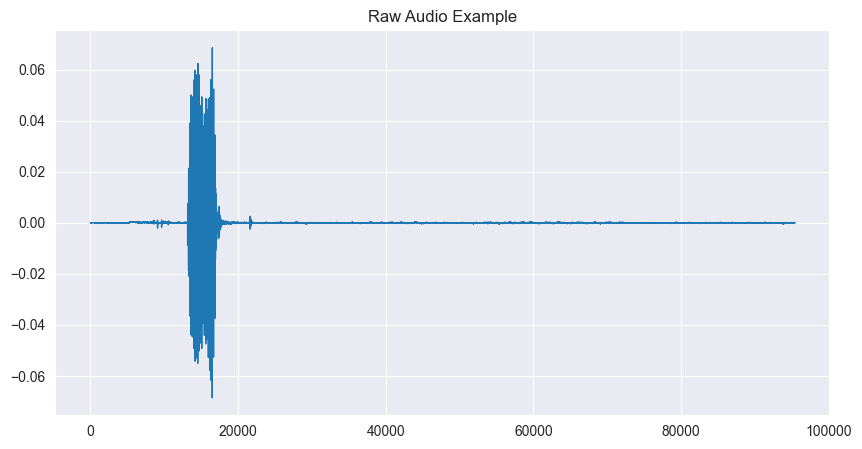

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

from glob import glob


list_of_data = glob('data/*.wav')

y, sr = librosa.load(list_of_data[0])
#y is raw data of audio data, sr is the sample data

print(sr)
print(y[:10])
print(y.shape)

pd.Series(y).plot(figsize=(10,5), lw = 1, title = "Raw Audio Example")
plt.show()



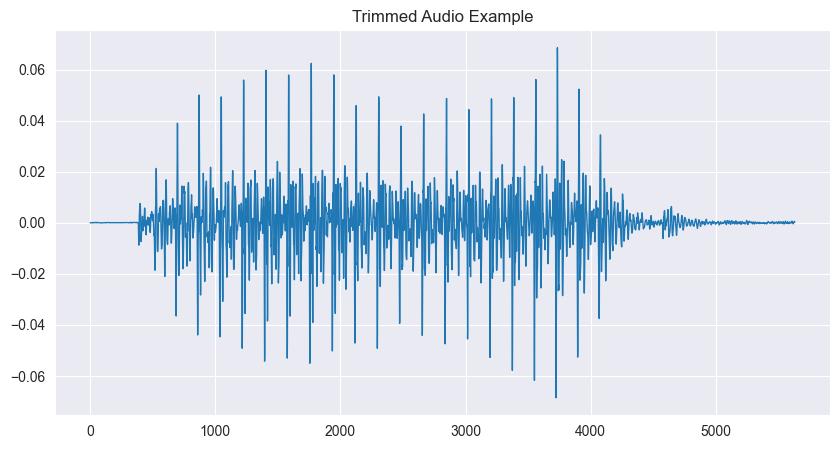

In [7]:
y_trimmed, silence = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5), lw = 1, title = "Trimmed Audio Example")
plt.show()

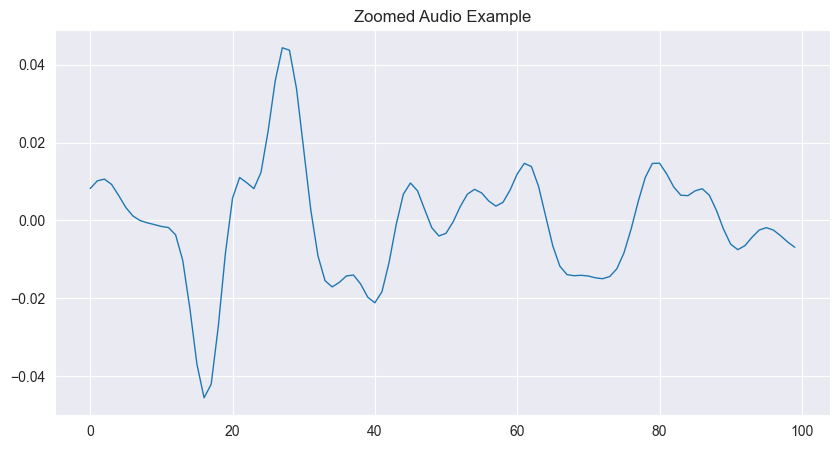

In [8]:

pd.Series(y_trimmed[3000:3100]).plot(figsize=(10,5), lw = 1, title = "Zoomed Audio Example")
plt.show()

In [11]:
D = librosa.stft(y)
Sound_Decibals = librosa.amplitude_to_db(np.abs(D), ref=np.max)
Sound_Decibals.shape

(1025, 187)

plotting

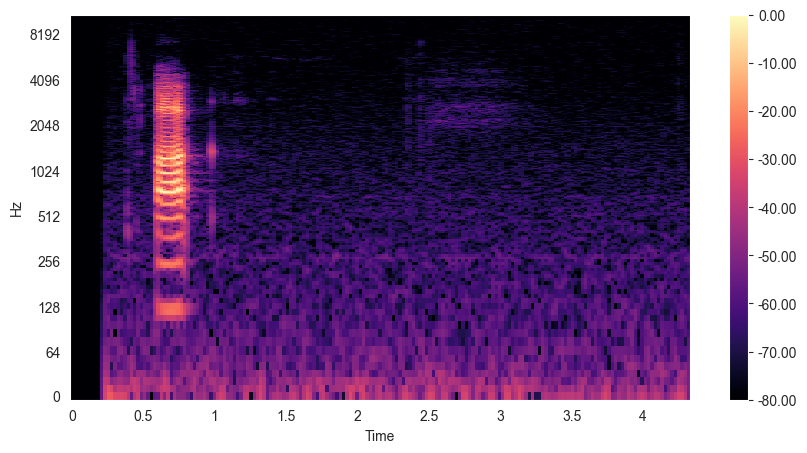

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
img = librosa.display.specshow(Sound_Decibals, x_axis ='time', y_axis = 'log' )
fig.colorbar(img, ax=ax, format = f'%0.2f')

Melodic spectogram

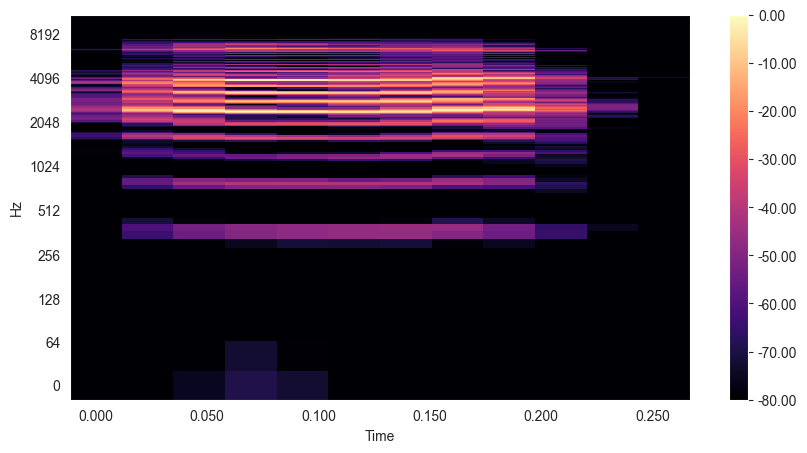

In [17]:
S = librosa.feature.melspectrogram(y=y_trimmed, sr = sr, n_mels = 128 * 2)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log')
fig.colorbar(img, ax=ax, format=f'%0.2f')

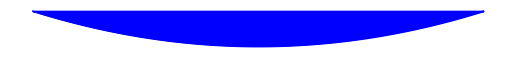

In [30]:
# Define x range
x = np.linspace(-32, 32, 400)

y = (5/1024) * x**2
y_straight = (np.full_like(x,5)) 

fig, ax = plt.subplots()
plt.plot(x, y, color='blue', linewidth=1)
plt.plot(x, y_straight, color='blue', linewidth=1)

plt.fill_between(x, y, y_straight, color = 'blue')
# Fill under the curve

# Formatting
ax.axis('off')
ax.set_aspect('equal')

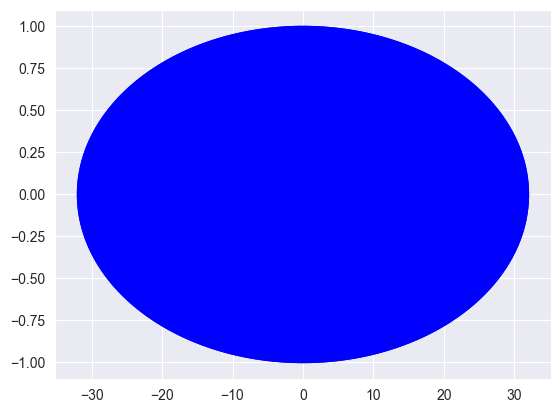

In [33]:
a = 32 
b = 1
theta = np.linspace(0, 2*np.pi, 300)

x = a * np.cos(theta)
y = b * np.sin(theta)


figure, ax = plt.subplots()
plt.plot(x, y, color='blue', linewidth=1)
ax.fill(x,y, color = 'blue')
